#Stock Price Prediction

## Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Download Stock Data

In [41]:
stock_data = yf.download('AAPL', start='2022-01-01', end='2025-01-01')
stock_data.to_csv("stock_data.csv")

[*********************100%***********************]  1 of 1 completed


## Load the data again to process

In [42]:
raw_df = pd.read_csv("stock_data.csv", header=[0, 1], index_col=0)

# Flatten multi-level columns
raw_df.columns = [col[0] for col in raw_df.columns]
df = raw_df.copy()

## Feature Selection

In [43]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

## Train-Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regressor Model Training

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Making Predictions

In [46]:
y_pred = model.predict(X_test)

## Evaluating Model

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2.100763705480241
R^2 Score: 0.9977397064476908


## Visualization - Scatter Plot

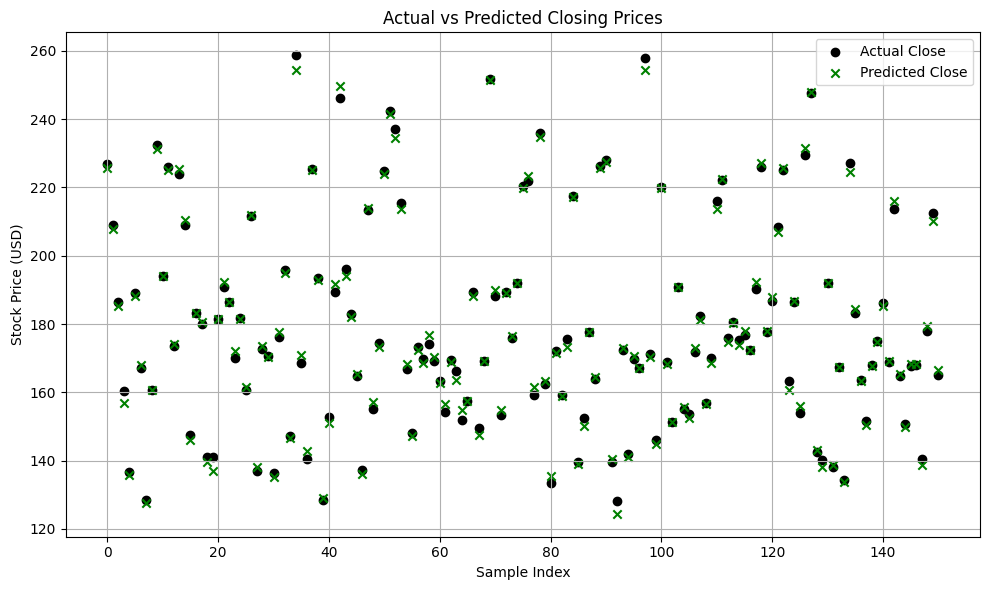

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test.values, label="Actual Close", marker='o', color='black')
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Close", marker='x', color='green')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()